In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
athlete_events = pd.read_csv('/Users/bayanswalha/Downloads/athlete_events.csv')
region = pd.read_csv('/Users/bayanswalha/Downloads/noc_regions.csv')

In [47]:
athlete_events.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [48]:
region.head(1)

,NOC,region,notes
0,AFG,Afghanistan,NaN


In [49]:
athlete = athlete_events.merge(region,how='left' , on='NOC')

In [50]:
athlete.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [7]:
athlete.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [8]:
athlete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [9]:
athlete.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
nan_values = athlete.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
region     True
notes      True
dtype: bool

In [11]:
athlete.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [13]:
athlete.duplicated().value_counts()

False    269731
True       1385
dtype: int64

# the percentage of females to males

In [16]:
athlete['Sex'].value_counts(normalize=True)

M    0.725129
F    0.274871
Name: Sex, dtype: float64

<AxesSubplot:xlabel='Medal', ylabel='count'>

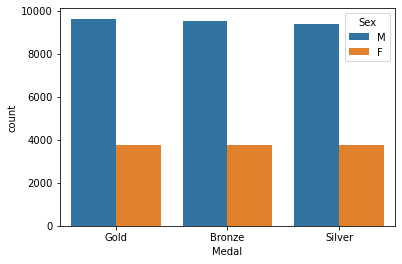

In [17]:
sns.countplot(data=athlete,x='Medal',hue='Sex')

# percent of men or males is larger than femles  in terms of winning Medals

<AxesSubplot:xlabel='Season', ylabel='count'>

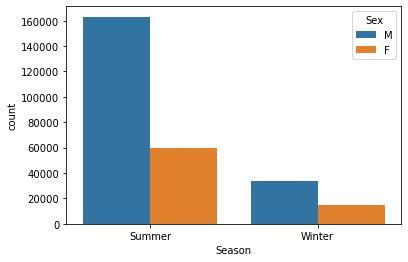

In [18]:
sns.countplot(data=athlete,x='Season',hue='Sex')

# The most popular Sports in terms on number of players .

<AxesSubplot:xlabel='Event'>

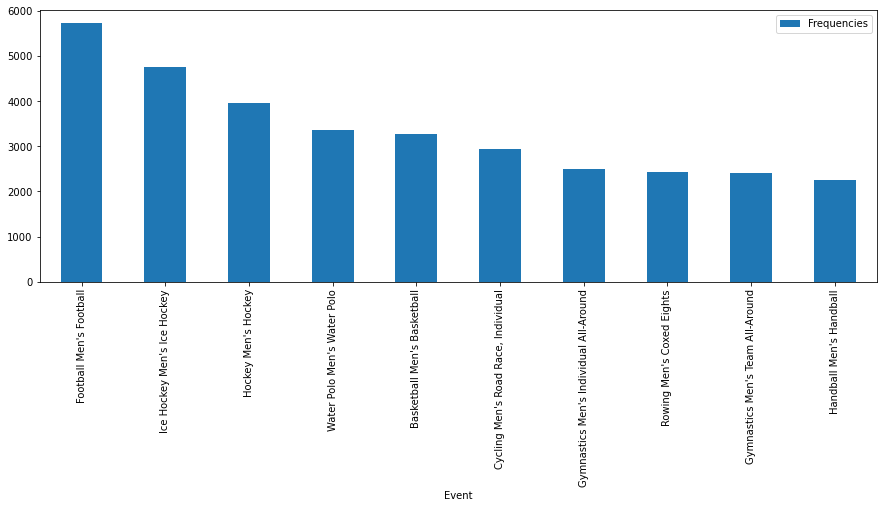

In [86]:
data = []

for Event in athlete['Event'].unique():
    data.append([Event , len(athlete[athlete['Event']  == Event])])

pd.DataFrame(data,columns = ['Event','Frequencies']).sort_values(by='Frequencies', ascending=False).head(10).plot(x = 'Event', y = 'Frequencies', kind = 'bar', figsize = (15,5))

# Top ten Sports having most number of medals 

<AxesSubplot:xlabel='Sport'>

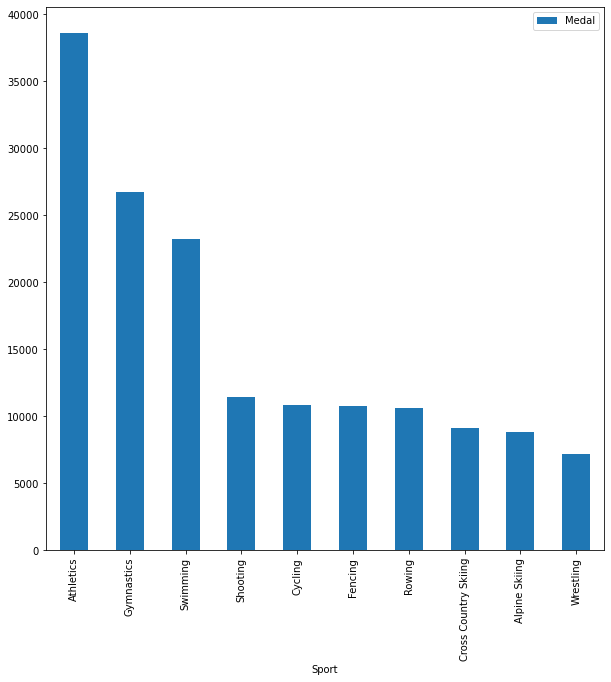

In [87]:
data=[]
for Sport in athlete['Sport'].unique():
  data.append([Sport,len(athlete[athlete['Sport']==Sport])])
pd.DataFrame(data,columns =['Sport','Medal']).sort_values(by='Medal',ascending=False).head(10).plot(x = 'Sport', y = 'Medal', kind = 'bar',figsize = (10,10))

# Cities who have hosted the Olympics for more than one time 

In [116]:
city = athlete.City.value_counts().reset_index(name="count").head(10)
city

,index,count
0,London,22426
1,Athina,15556
2,Sydney,13821
3,Atlanta,13780
4,Rio de Janeiro,13688
5,Beijing,13602
6,Barcelona,12977
7,Los Angeles,12423
8,Seoul,12037
9,Munich,10304


In [124]:
city = athlete.groupby('City').apply(lambda x:x['Year'].unique()).to_frame().reset_index().head(10)
city.columns = ['City','Year']
city['Occurence'] = [len(c) for c in city['Year']]
city= city.sort_values('Occurence',ascending=False)
city.head()

,City,Year,Occurence
3,Athina,"[2004, 1906, 1896]",3
0,Albertville,[1992],1
1,Amsterdam,[1928],1
2,Antwerpen,[1920],1
4,Atlanta,[1996],1


<AxesSubplot:xlabel='City', ylabel='Occurence'>

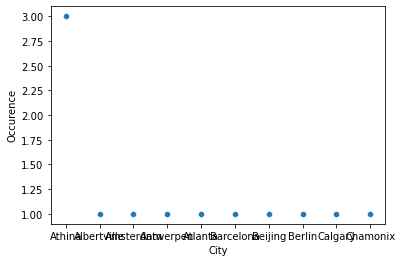

In [122]:
sns.scatterplot(x='City',y='Occurence',data=city)

# max number of participants from one country along the tournament

In [19]:
athlete['NOC'].value_counts().head()

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: NOC, dtype: int64

In [21]:
athlete['Team'].value_counts().head()

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: Team, dtype: int64

### MIN number of participants from one country

In [23]:
athlete['NOC'].value_counts().tail()

YMD    5
SSD    3
NBO    2
UNK    2
NFL    1
Name: NOC, dtype: int64

## average age for males and females

In [25]:
athlete.groupby(['Sex'])['Age'].mean()

Sex
F    23.732881
M    26.277562
Name: Age, dtype: float64

## oldest participant

In [26]:
athlete[athlete['Age']==athlete['Age'].max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


## youngest participant

In [27]:
athlete[athlete['Age']==athlete['Age'].min()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece,NaN


## games count through out the years

In [28]:
athlete['Games'].value_counts()

2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
1992 Summer    12977
2012 Summer    12920
1988 Summer    12037
1972 Summer    10304
1984 Summer     9454
1976 Summer     8641
1968 Summer     8588
1952 Summer     8270
1960 Summer     8119
1964 Summer     7702
1980 Summer     7191
1936 Summer     6506
1948 Summer     6405
1924 Summer     5233
1956 Summer     5127
1928 Summer     4992
2014 Winter     4891
2010 Winter     4402
2006 Winter     4382
1920 Summer     4292
2002 Winter     4109
1912 Summer     4040
1998 Winter     3605
1992 Winter     3436
1994 Winter     3160
1908 Summer     3101
1932 Summer     2969
1988 Winter     2639
1984 Winter     2134
1900 Summer     1936
1968 Winter     1891
1976 Winter     1861
1964 Winter     1778
1980 Winter     1746
1906 Summer     1733
1972 Winter     1655
1956 Winter     1307
1904 Summer     1301
1960 Winter     1116
1952 Winter     1088
1948 Winter     1075
1936 Winter      895
1928 Winter  

<AxesSubplot:xlabel='Age', ylabel='Count'>

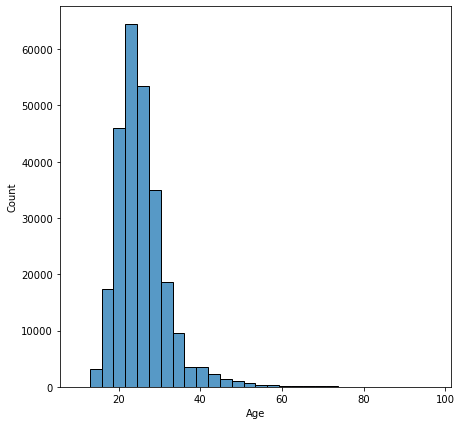

In [29]:
plt.figure(figsize=(7,7))
sns.histplot(data=athlete['Age'],kde=False,bins=30)

## Top countries that won

In [40]:
top_countries = athlete.Team.value_counts().sort_values(ascending=False).head(10)
top_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Top countries that participated'}, ylabel='Team'>

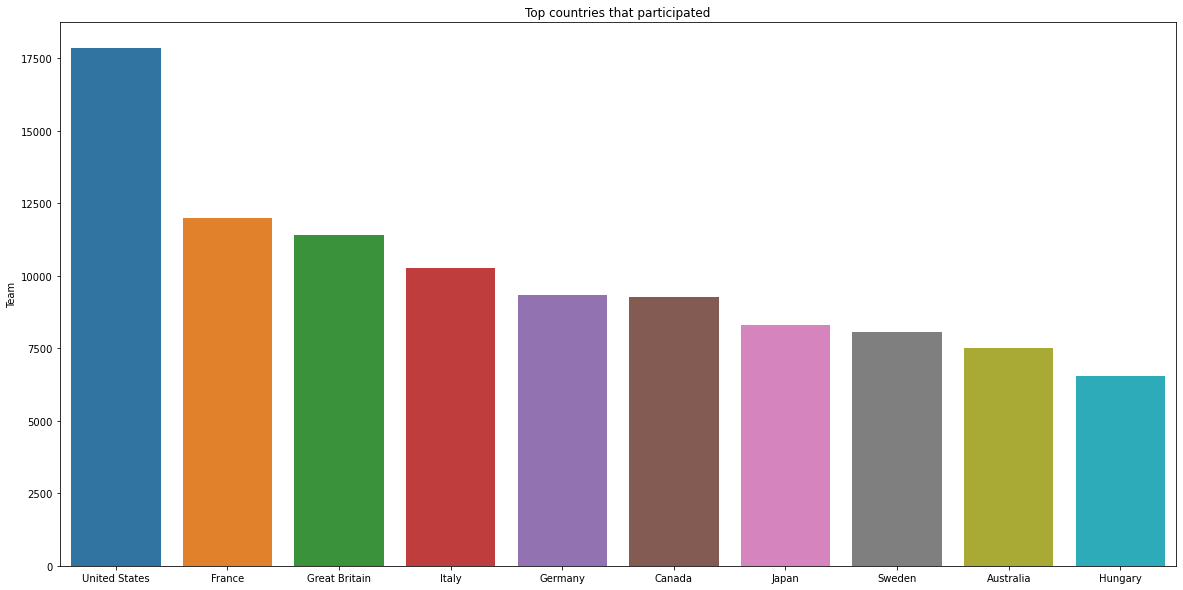

In [39]:
plt.figure(figsize=(20,10))
plt.title('Top countries that participated')
sns.barplot(x=top_countries.index , y=top_countries)

In [41]:
wintersport= athlete[athlete.Season =='Winter'].Sport.unique()
wintersport

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [42]:
summersport= athlete[athlete.Season =='Summer'].Sport.unique()
summersport

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [74]:
goldmedal= athlete[athlete['Medal']=='Gold']

In [44]:
goldmedal.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN


## The distribution of ages that won gold medals

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


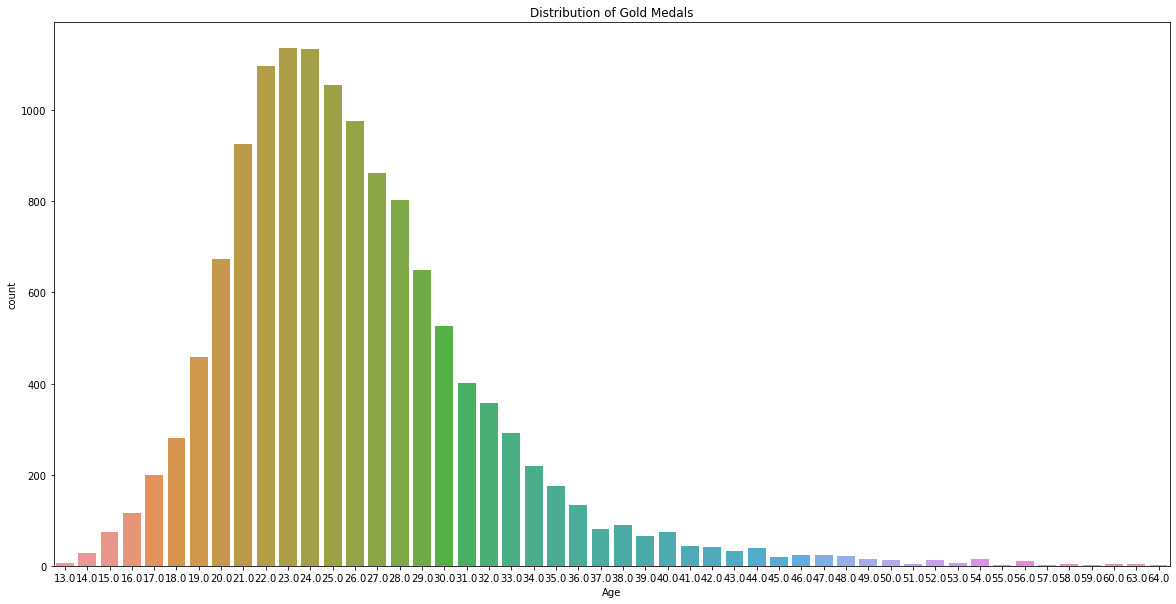

In [45]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of Gold Medals')
sns.countplot(goldmedal['Age'])
plt.show()

## People that won a gold medal over the age of 60

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


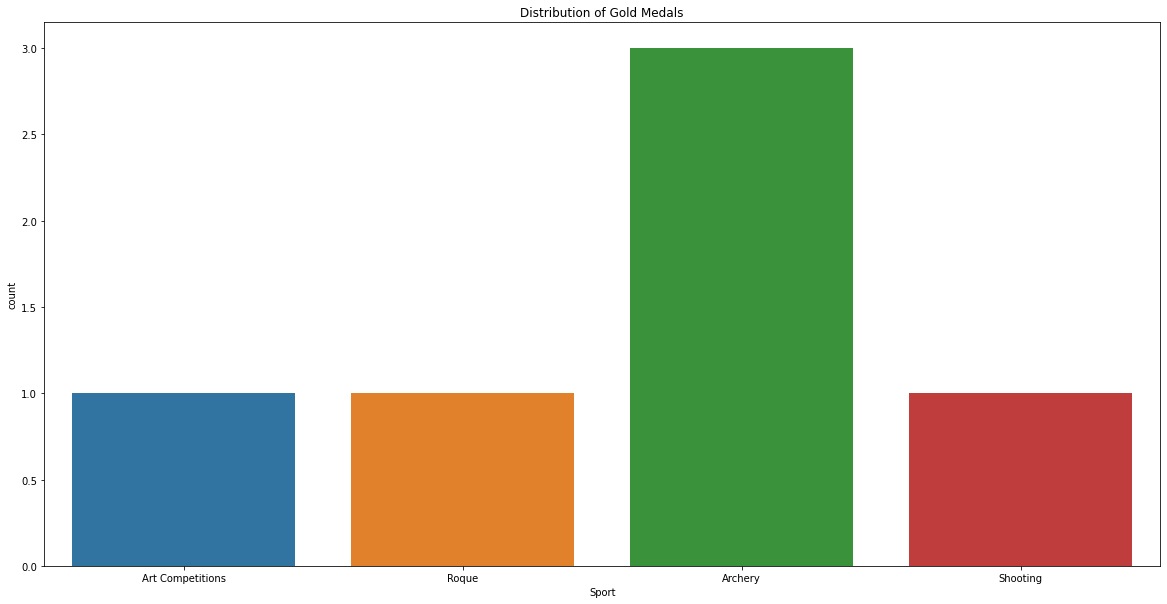

In [7]:
MM = goldmedal['Sport'][goldmedal['Age'] > 60]
plt.figure(figsize=(20, 10))
plt.title('Distribution of Gold Medals')
sns.countplot(MM)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Age'>

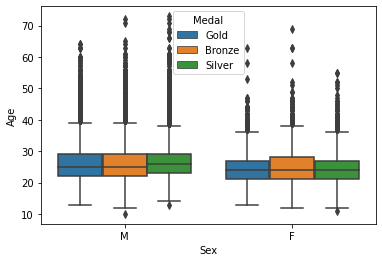

In [30]:
sns.boxplot(x='Sex',y='Age',hue='Medal',data=athlete)

## The distribution of female participants over time

In [65]:
womenInOlympics = athlete[(athlete.Sex == 'F') & (athlete.Season == 'Summer')]
womenInOlympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


Text(0.5, 1.0, 'Women medals per edition of the Games')

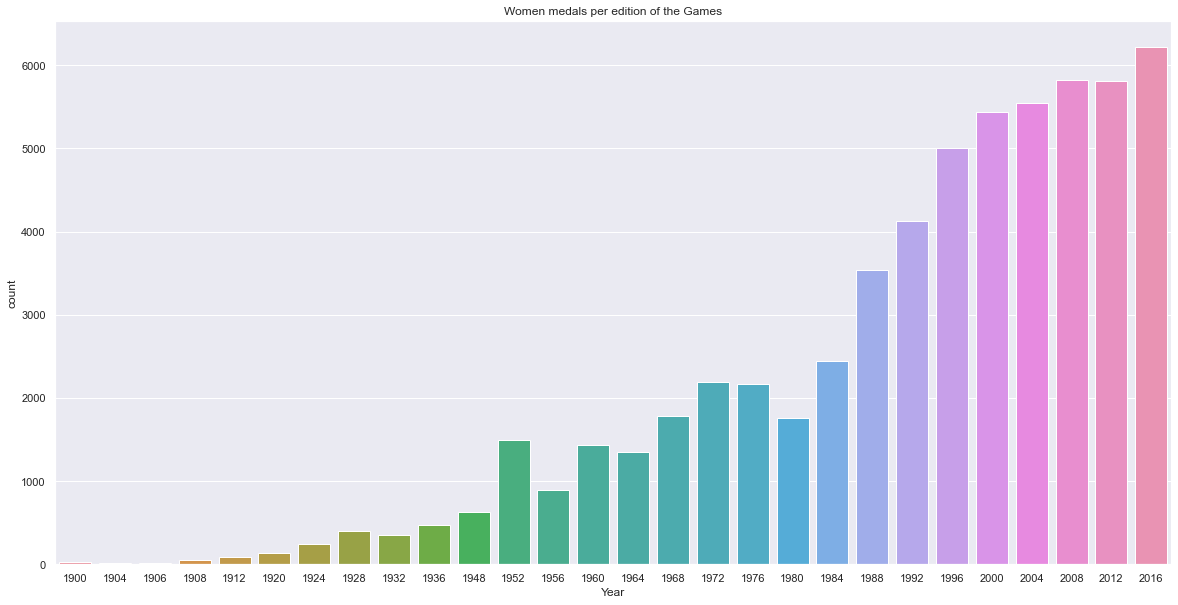

In [66]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')

## Gender distribution

([<matplotlib.patches.Wedge at 0x7f8828dced90>,
 [Text(-0.7006006683865593, 0.8480322537830189, 'M'),
  Text(0.7006005889880468, -0.8480323193779835, 'F')],
 [Text(-0.3821458191199414, 0.46256304751801025, '72.0%'),
  Text(0.3821457758116618, -0.46256308329708185, '28.0%')])

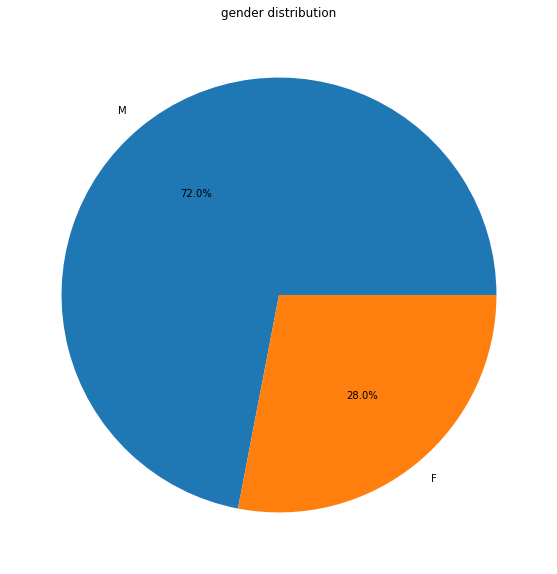

In [54]:
gender_counts = goldmedal['Sex'].value_counts()
plt.figure(figsize=(20,10))
plt.title('gender distribution')
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%')

<AxesSubplot:xlabel='Medal', ylabel='count'>

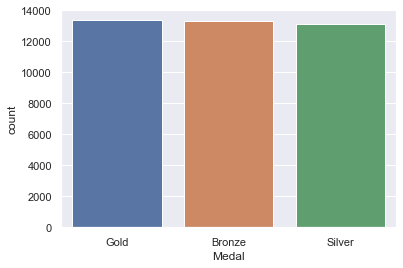

In [72]:
sns.countplot(x='Medal',data=athlete)

<AxesSubplot:xlabel='Sport'>

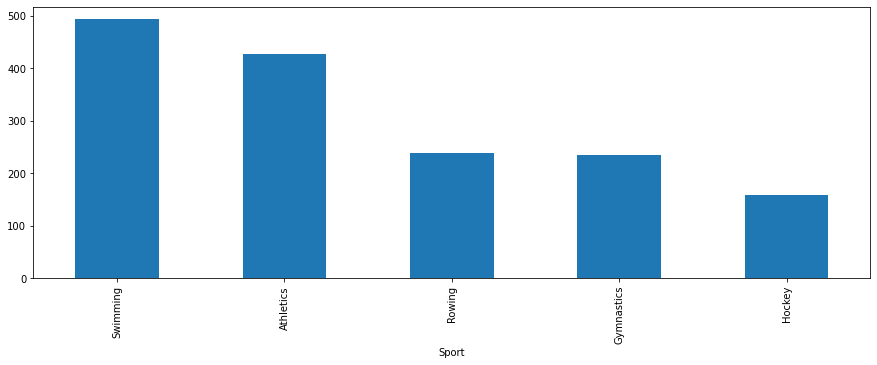

In [81]:
femaleGold = goldmedal[goldmedal['Sex']=='F'].groupby('Sport').count().sort_values(['Medal'],ascending=False)
femaleGold['Medal'].head().plot(x = 'Sport', y = 'Medal', kind = 'bar', figsize = (15,5))

In [63]:
athlete['Name'].value_counts()

Robert Tait McKenzie                58
Heikki Ilmari Savolainen            39
Joseph "Josy" Stoffel               38
Ioannis Theofilakis                 36
Takashi Ono                         33
                                    ..
Cylia Vabre                          1
Soso Jabidze                         1
Iveta Bielikov                       1
Marcus Viktor Krger                  1
Sharon Marie Callahan (-McKniff)     1
Name: Name, Length: 134732, dtype: int64

In [64]:
athlete[athlete['Name']=='Robert Tait McKenzie']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
154798,77710,Robert Tait McKenzie,M,44.0,NaN,NaN,Canada,CAN,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,NaN,Canada,NaN
154799,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,Canada,NaN
154800,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,Canada,NaN
154801,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,Canada,NaN
154802,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,Canada,NaN
154803,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,Canada,NaN
154804,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,Canada,NaN
154805,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,Canada,NaN
154806,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Medals And...",Bronze,Canada,NaN
154807,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Canada,NaN


In [73]:
toppart=athlete.Name.value_counts().reset_index(name="count").head(5)
toppart

,index,count
0,Robert Tait McKenzie,58
1,Heikki Ilmari Savolainen,39
2,"Joseph ""Josy"" Stoffel",38
3,Ioannis Theofilakis,36
4,Takashi Ono,33


Text(0.5, 1.0, 'Top participants')

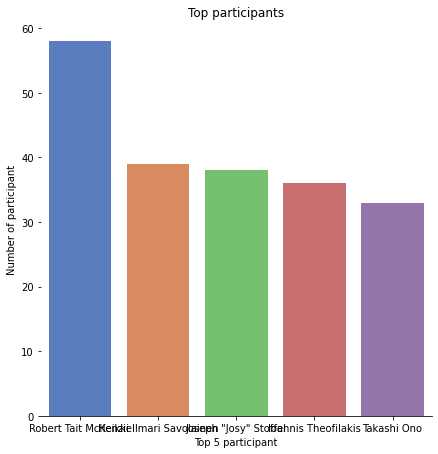

In [80]:
g = sns.catplot(x="index", y="count", data=toppart,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 participant")
g.set_ylabels("Number of participant")
plt.title('Top participants')

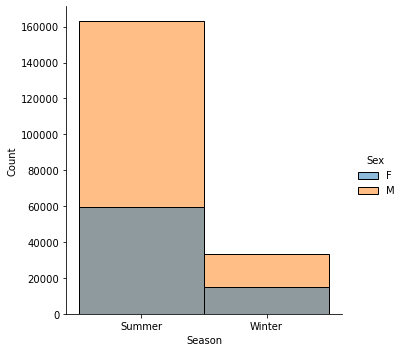

In [82]:
sns.displot(data=athlete , x='Season' , hue='Sex' , hue_order=['F','M'])

## Countries with the most gold medals 

In [75]:
goldmedal.region.value_counts().reset_index(name="Medal").head()

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


Text(0.5, 1.0, 'Medals per Country')

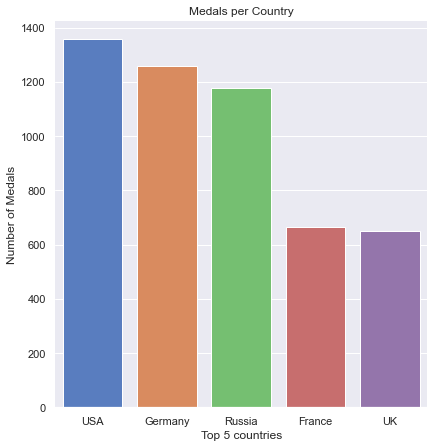

In [69]:
totalGoldMedals = goldmedal.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

## Height vs Weight of Olympic Medalists

In [71]:
notNullMedals = goldmedal[(goldmedal['Height'].notnull()) & (goldmedal['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

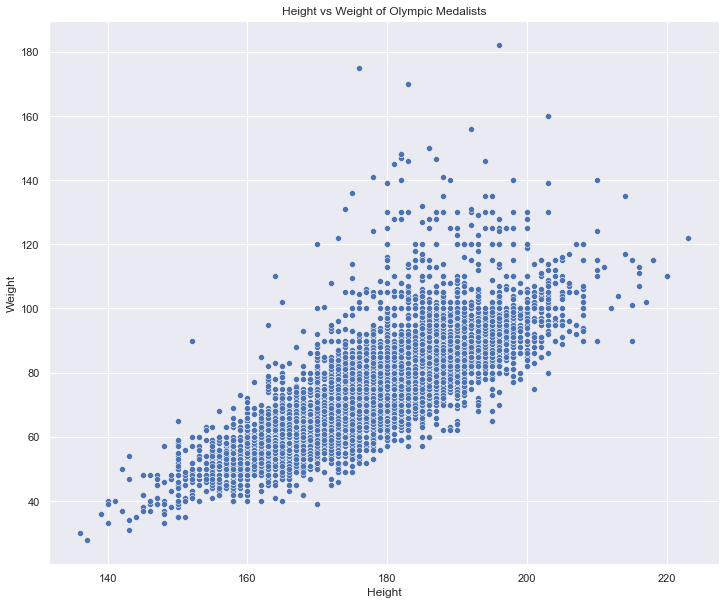

In [73]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=notNullMedals)
plt.title('Height vs Weight of Olympic Medalists')

<Figure size 1440x432 with 0 Axes>

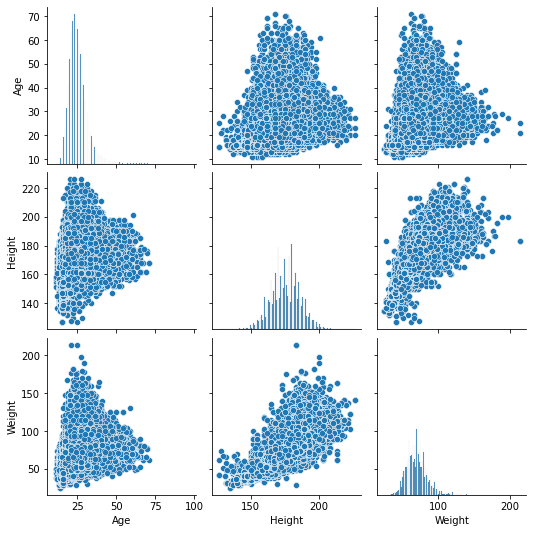

In [83]:
plt.figure(figsize=(20,6))
sns.pairplot(athlete[['Age','Height','Weight']])

## Variation of Male Athletes over time

In [33]:
MenoverTime = athlete[(athlete.Sex == 'M') & (athlete.Season == 'Summer')]
WomenoverTime = athlete[(athlete.Sex == 'F') & (athlete.Season == 'Summer')]

Text(0.5, 1.0, 'Variation of Male Athletes over time')

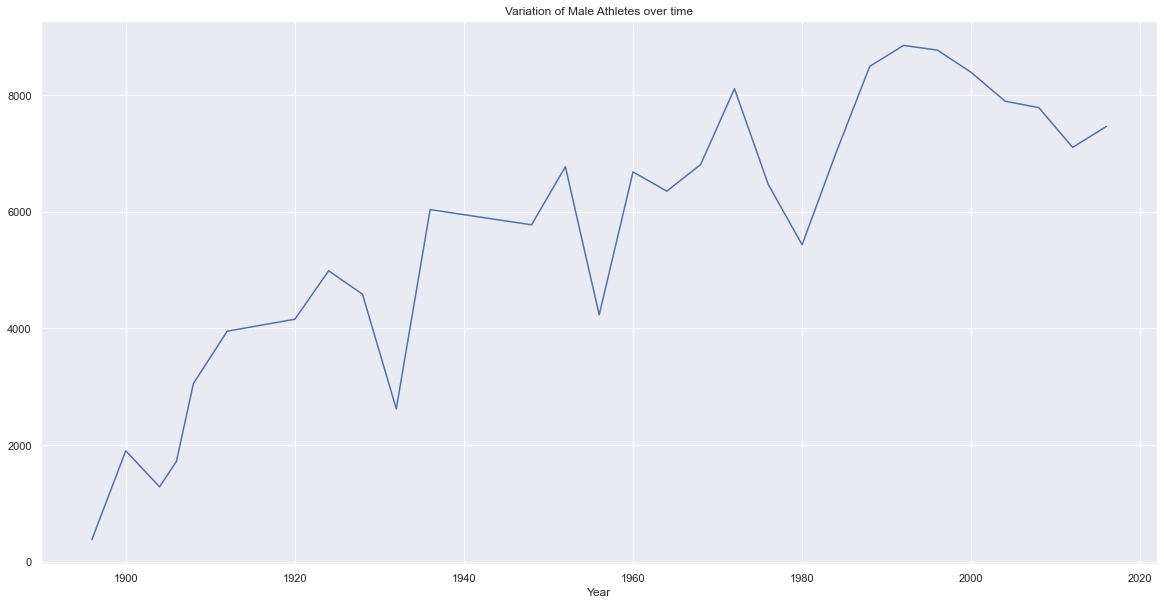

In [77]:
part = MenoverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

## Variation of Female Athletes over time

Text(0.5, 1.0, 'Variation of Female Athletes over time')

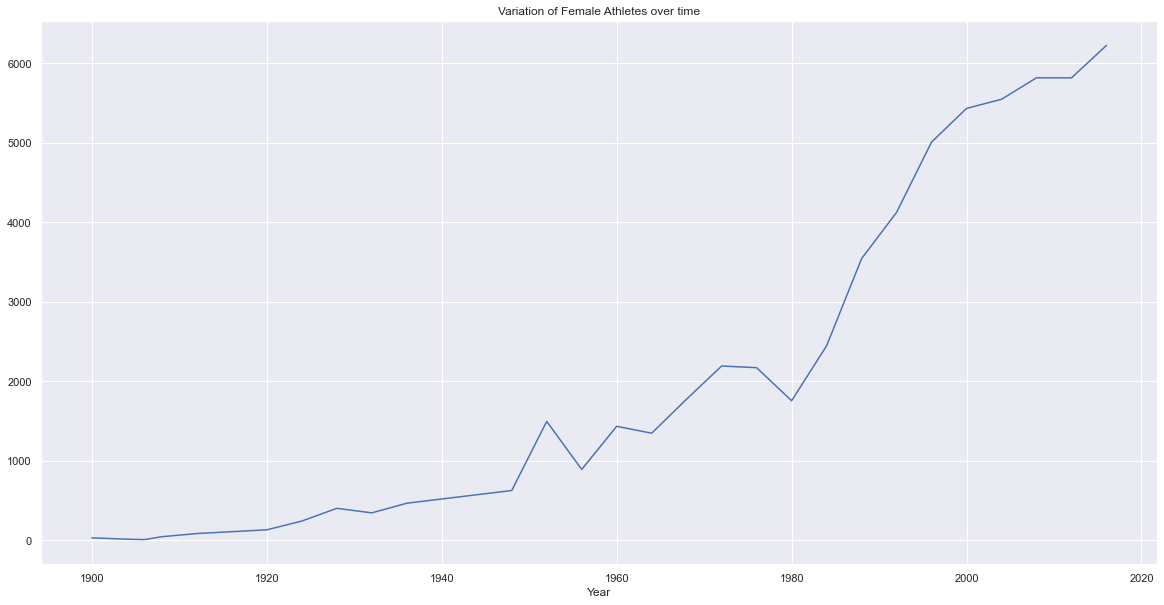

In [79]:
part = WomenoverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

## Variation of Age for Male Athletes over time

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Age for Male Athletes over time')

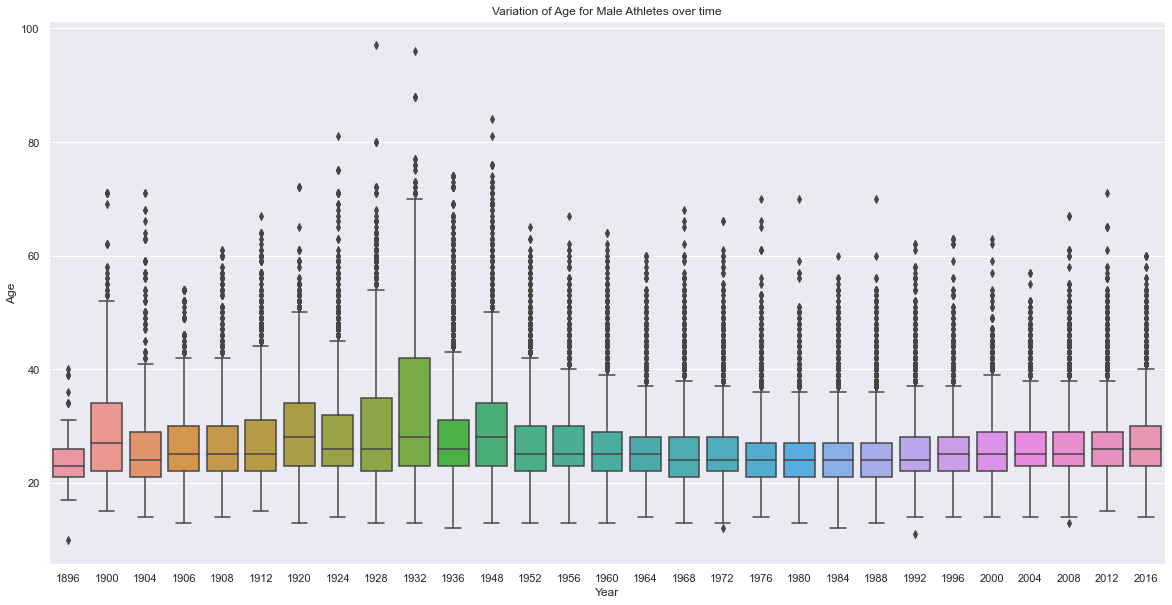

In [81]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=MenoverTime)
plt.title('Variation of Age for Male Athletes over time')

## Variation of Age for Female Athletes over time

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Age for Female Athletes over time')

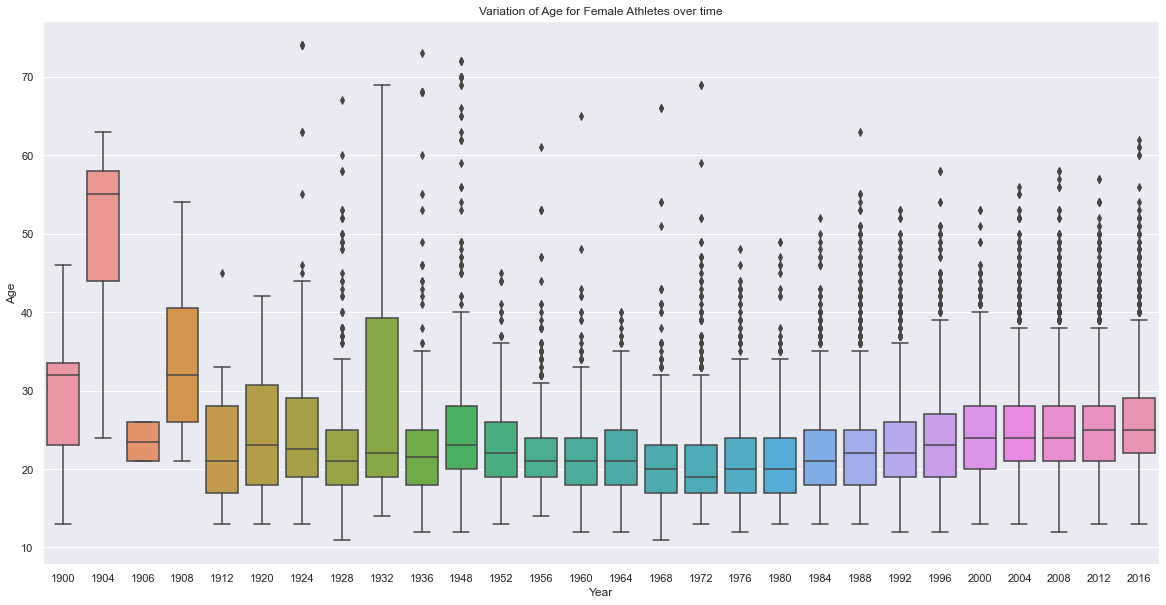

In [83]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=WomenoverTime)
plt.title('Variation of Age for Female Athletes over time')

In [ ]:
## Variation of Height for Male Athletes over time

In [34]:
MenoverTime[MenoverTime['Height']==MenoverTime['Height'].max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,China,NaN
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN,China,NaN
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN,China,NaN


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Height for Male Athletes over time')

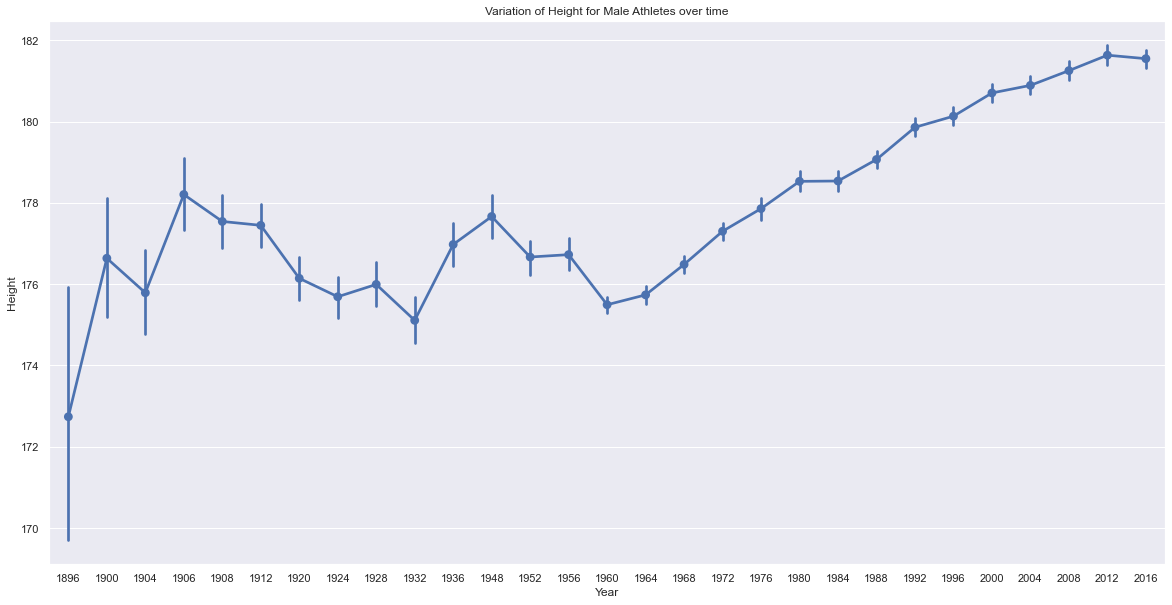

In [85]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Height', data=MenoverTime)
plt.title('Variation of Height for Male Athletes over time')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Height for Female Athletes over time')

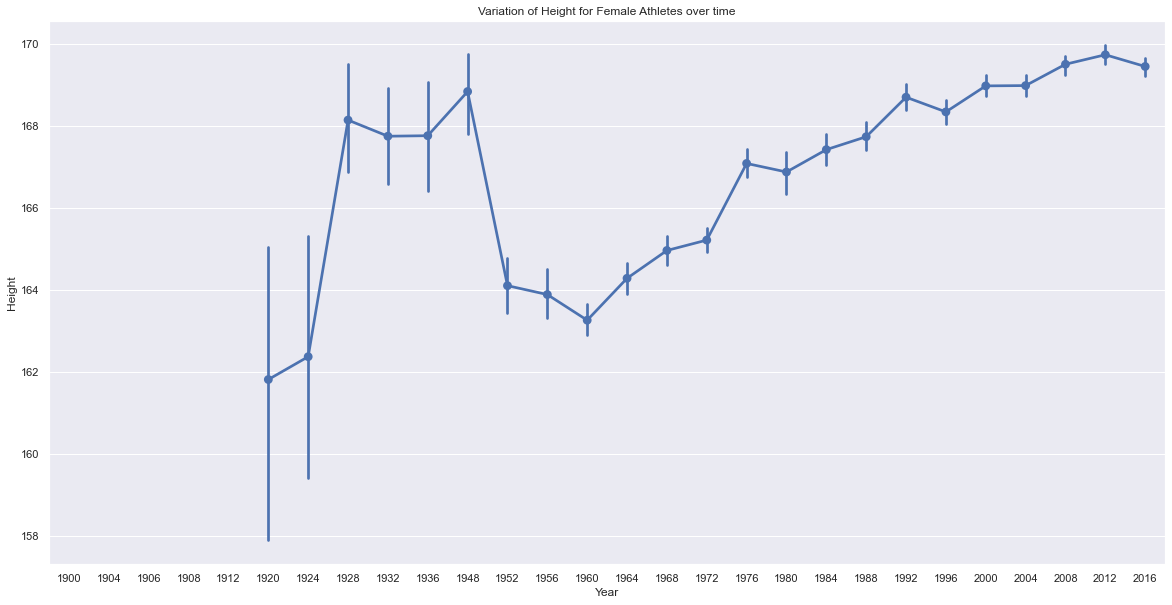

In [87]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Height', data=WomenoverTime)
plt.title('Variation of Height for Female Athletes over time')

In [51]:
data=pd.read_csv('/Users/bayanswalha/Downloads/athlete_events.csv')


In [52]:
data.sort_values(by='Name',inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 1560 to 102956
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 33.1+ MB


In [56]:
data['Age'].fillna(athlete['Age'].median(),inplace=True)

In [57]:
data['Height'].fillna(athlete['Height'].median(),inplace=True)

In [58]:
data['Weight'].fillna(athlete['Weight'].median(),inplace=True)

In [59]:
(data.isnull().sum()/len(athlete))*100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        0.000000
Height     0.000000
Weight     0.000000
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.326207
dtype: float64

In [60]:
data.drop(['Medal'],axis=1,inplace=True)

In [62]:
(data.isnull().sum()/len(athlete))*100

ID        0.0
Name      0.0
Sex       0.0
Age       0.0
Height    0.0
Weight    0.0
Team      0.0
NOC       0.0
Games     0.0
Year      0.0
Season    0.0
City      0.0
Sport     0.0
Event     0.0
dtype: float64